<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_4X/blob/main/GQtest_groupwise_(y_hat)_0_5_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_4X/groupwise_0.5_type_I _error'

In [4]:
os.listdir(base_path)

['data_groupwise_0.5_n20.csv',
 'data_groupwise_0.5_n30.csv',
 'data_groupwise_0.5_n60.csv',
 'data_groupwise_0.5_n120.csv',
 'data_groupwise_0.5_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.5_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,42.088399,89.596932,85.931849,58.736673,0.869704,287.223557,286.546449,0.677108
1,0.0,1.0,88.966822,56.770127,29.049687,35.478372,0.130690,220.395698,220.185444,0.210254
2,0.0,2.0,72.993439,96.559308,95.990992,30.575034,0.329857,306.448630,306.249305,0.199325
3,0.0,3.0,84.008919,86.202599,60.315230,47.229199,-0.282283,287.473664,287.795795,-0.322131
4,0.0,4.0,90.414142,22.311642,73.327501,69.232277,0.103897,265.389459,265.589264,-0.199806
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,84.821489,25.031629,39.082269,99.324614,-0.789071,257.470928,258.168715,-0.697787
59996,999.0,56.0,98.102559,76.018292,62.526074,34.017915,-0.057724,280.607115,280.373897,0.233218
59997,999.0,57.0,42.123600,53.917874,54.433083,72.517494,0.392574,233.384625,233.165738,0.218888
59998,999.0,58.0,41.854130,43.595421,98.173948,52.741665,1.369437,247.734602,246.517585,1.217017


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,42.088399,89.596932,85.931849,58.736673,0.869704,287.223557,286.546449,0.677108
1,0.0,1.0,88.966822,56.770127,29.049687,35.478372,0.130690,220.395698,220.185444,0.210254
2,0.0,2.0,72.993439,96.559308,95.990992,30.575034,0.329857,306.448630,306.249305,0.199325
3,0.0,3.0,84.008919,86.202599,60.315230,47.229199,-0.282283,287.473664,287.795795,-0.322131
4,0.0,4.0,90.414142,22.311642,73.327501,69.232277,0.103897,265.389459,265.589264,-0.199806
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,84.821489,25.031629,39.082269,99.324614,-0.789071,257.470928,258.168715,-0.697787
59996,999.0,56.0,98.102559,76.018292,62.526074,34.017915,-0.057724,280.607115,280.373897,0.233218
59997,999.0,57.0,42.123600,53.917874,54.433083,72.517494,0.392574,233.384625,233.165738,0.218888
59998,999.0,58.0,41.854130,43.595421,98.173948,52.741665,1.369437,247.734602,246.517585,1.217017


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    42.088399  89.596932  85.931849  58.736673  0.869704  287.223557   
      1.0    88.966822  56.770127  29.049687  35.478372  0.130690  220.395698   
      2.0    72.993439  96.559308  95.990992  30.575034  0.329857  306.448630   
      3.0    84.008919  86.202599  60.315230  47.229199 -0.282283  287.473664   
      4.0    90.414142  22.311642  73.327501  69.232277  0.103897  265.389459   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   84.821489  25.031629  39.082269  99.324614 -0.789071  257.470928   
      56.0   98.102559  76.018292  62.526074  34.017915 -0.057724  280.607115   
      57.0   42.123600  53.917874  54.433083  72.517494  0.392574  233.384625   
      58.0   41.854130  43.595421  98.173948  52.741665  1.369437  247.734602   
      59.0   67.014400  56.407526  59.700753  61.974868 -1.002097  254.095450   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    286.546449  0.677108  
      1.0    220.185444  0.210254  
      2.0    306.249305  0.199325  
      3.0    287.795795 -0.322131  
      4.0    265.589264 -0.199806  
...                 ...       ...  
999.0 55.0   258.168715 -0.697787  
      56.0   280.373897  0.233218  
      57.0   233.165738  0.218888  
      58.0   246.517585  1.217017  
      59.0   255.072622 -0.977171  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    42.088399  89.596932  85.931849  58.736673  0.869704  287.223557   
      1.0    88.966822  56.770127  29.049687  35.478372  0.130690  220.395698   
      2.0    72.993439  96.559308  95.990992  30.575034  0.329857  306.448630   
      3.0    84.008919  86.202599  60.315230  47.229199 -0.282283  287.473664   
      4.0    90.414142  22.311642  73.327501  69.232277  0.103897  265.389459   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   84.821489  25.031629  39.082269  99.324614 -0.789071  257.470928   
      56.0   98.102559  76.018292  62.526074  34.017915 -0.057724  280.607115   
      57.0   42.123600  53.917874  54.433083  72.517494  0.392574  233.384625   
      58.0   41.854130  43.595421  98.173948  52.741665  1.369437  247.734602   
      59.0   67.014400  56.407526  59.700753  61.974868 -1.002097  254.095450   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    286.546449  0.677108  
      1.0    220.185444  0.210254  
      2.0    306.249305  0.199325  
      3.0    287.795795 -0.322131  
      4.0    265.589264 -0.199806  
...                 ...       ...  
999.0 55.0   258.168715 -0.697787  
      56.0   280.373897  0.233218  
      57.0   233.165738  0.218888  
      58.0   246.517585  1.217017  
      59.0   255.072622 -0.977171  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,42.088399,89.596932,85.931849,58.736673,0.869704,287.223557,286.546449,0.677108
1,0.0,1.0,88.966822,56.770127,29.049687,35.478372,0.130690,220.395698,220.185444,0.210254
2,0.0,2.0,72.993439,96.559308,95.990992,30.575034,0.329857,306.448630,306.249305,0.199325
3,0.0,3.0,84.008919,86.202599,60.315230,47.229199,-0.282283,287.473664,287.795795,-0.322131
4,0.0,4.0,90.414142,22.311642,73.327501,69.232277,0.103897,265.389459,265.589264,-0.199806
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,84.821489,25.031629,39.082269,99.324614,-0.789071,257.470928,258.168715,-0.697787
59996,999.0,56.0,98.102559,76.018292,62.526074,34.017915,-0.057724,280.607115,280.373897,0.233218
59997,999.0,57.0,42.123600,53.917874,54.433083,72.517494,0.392574,233.384625,233.165738,0.218888
59998,999.0,58.0,41.854130,43.595421,98.173948,52.741665,1.369437,247.734602,246.517585,1.217017


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    42.088399  89.596932  85.931849  58.736673  0.869704  287.223557   
      1.0    88.966822  56.770127  29.049687  35.478372  0.130690  220.395698   
      2.0    72.993439  96.559308  95.990992  30.575034  0.329857  306.448630   
      3.0    84.008919  86.202599  60.315230  47.229199 -0.282283  287.473664   
      4.0    90.414142  22.311642  73.327501  69.232277  0.103897  265.389459   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   84.821489  25.031629  39.082269  99.324614 -0.789071  257.470928   
      56.0   98.102559  76.018292  62.526074  34.017915 -0.057724  280.607115   
      57.0   42.123600  53.917874  54.433083  72.517494  0.392574  233.384625   
      58.0   41.854130  43.595421  98.173948  52.741665  1.369437  247.734602   
      59.0   67.014400  56.407526  59.700753  61.974868 -1.002097  254.095450   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    286.546449  0.677108  
      1.0    220.185444  0.210254  
      2.0    306.249305  0.199325  
      3.0    287.795795 -0.322131  
      4.0    265.589264 -0.199806  
...                 ...       ...  
999.0 55.0   258.168715 -0.697787  
      56.0   280.373897  0.233218  
      57.0   233.165738  0.218888  
      58.0   246.517585  1.217017  
      59.0   255.072622 -0.977171  

[60000 rows x 8 columns]

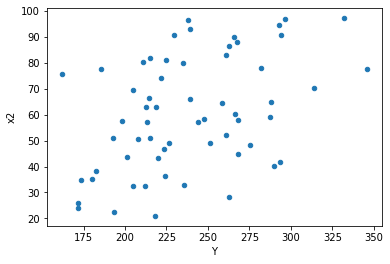

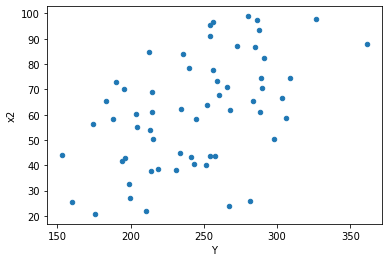

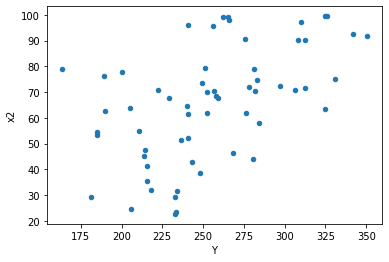

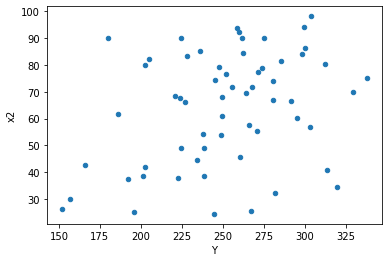

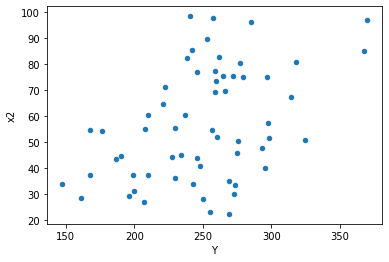

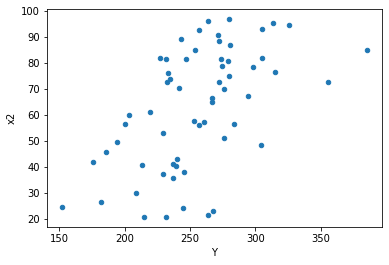

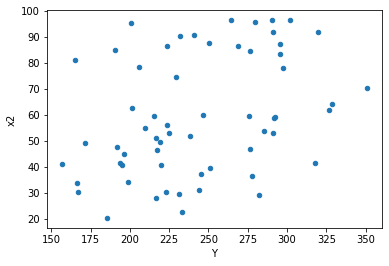

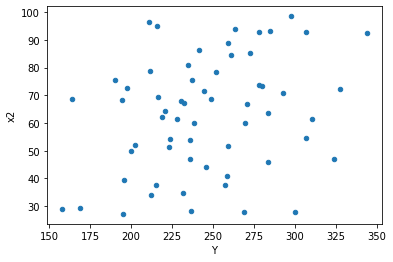

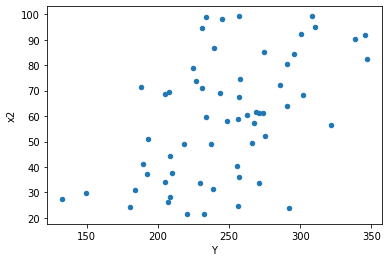

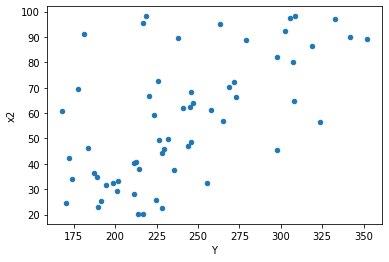

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='Y', y='x2', kind = 'scatter')
tablenew1.plot(x ='Y', y='x2', kind = 'scatter')
tablenew2.plot(x ='Y', y='x2', kind = 'scatter')
tablenew3.plot(x ='Y', y='x2', kind = 'scatter')
tablenew4.plot(x ='Y', y='x2', kind = 'scatter')
tablenew5.plot(x ='Y', y='x2', kind = 'scatter')
tablenew6.plot(x ='Y', y='x2', kind = 'scatter')
tablenew7.plot(x ='Y', y='x2', kind = 'scatter')
tablenew8.plot(x ='Y', y='x2', kind = 'scatter')
tablenew9.plot(x ='Y', y='x2', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,20.0,20.0,5.108386293290359,15.839535643036855,0.25541931466451795,0.7919767821518428,3.1006926128200973,0.014788928465776507,0.9926055357671117,0.007394464232888254,Reject005=0 : Heteroscedasticity
3.0,20.0,20.0,7.421262628112087,9.378170068480639,0.3710631314056044,0.46890850342403195,1.2636892855611517,0.6056863290772765,0.6971568354613618,0.30284316453863824,Reject005=1 : Homoscedasticity
5.0,20.0,20.0,8.217627882312277,8.829440467539948,0.41088139411561386,0.4414720233769974,1.0744512399429214,0.8740143484599161,0.562992825770042,0.43700717422995805,Reject005=1 : Homoscedasticity
6.0,20.0,20.0,10.017124852583384,16.738455807960992,0.5008562426291692,0.8369227903980496,1.670984045251687,0.2594409207903705,0.8702795396048147,0.12972046039518526,Reject005=1 : Homoscedasticity
9.0,20.0,20.0,9.254393873434132,10.165816259122078,0.4627196936717066,0.5082908129561039,1.0984853679401192,0.8357027147900844,0.5821486426049578,0.4178513573950422,Reject005=1 : Homoscedasticity
12.0,20.0,20.0,4.942377472222308,5.668881692658258,0.2471188736111154,0.2834440846329129,1.1469948874846425,0.7620868965165941,0.6189565517417029,0.38104344825829706,Reject005=1 : Homoscedasticity
13.0,20.0,20.0,7.432917909876667,13.39955562051798,0.37164589549383337,0.669977781025899,1.8027315494380747,0.19627345606648183,0.9018632719667591,0.09813672803324092,Reject005=1 : Homoscedasticity
15.0,20.0,20.0,6.725030360138397,9.2929652664723,0.3362515180069198,0.46464826332361503,1.3818473328469938,0.47604103705915213,0.7619794814704239,0.23802051852957606,Reject005=1 : Homoscedasticity
17.0,20.0,20.0,5.606565055842063,8.415939917415345,0.28032825279210316,0.42079699587076724,1.5010866428181193,0.37133635759832107,0.8143318212008395,0.18566817879916053,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,20.0,8.253804395163614,7.950166874610123,0.4126902197581807,0.39750834373050614,0.9632124162366374,0.9340362604086259,Reject005=1 : Homoscedasticity
1.0,20.0,20.0,5.108386293290359,15.839535643036855,0.25541931466451795,0.7919767821518428,3.1006926128200973,0.014788928465776507,Reject005=0 : Heteroscedasticity
2.0,20.0,20.0,9.475499302349624,7.997935781507416,0.4737749651174812,0.3998967890753708,0.8440648377784357,0.7082974034193759,Reject005=1 : Homoscedasticity
3.0,20.0,20.0,7.421262628112087,9.378170068480639,0.3710631314056044,0.46890850342403195,1.2636892855611517,0.6056863290772765,Reject005=1 : Homoscedasticity
4.0,20.0,20.0,14.788714024479177,9.768964602671145,0.7394357012239589,0.48844823013355726,0.6605689031852913,0.36151923849565304,Reject005=1 : Homoscedasticity
5.0,20.0,20.0,8.217627882312277,8.829440467539948,0.41088139411561386,0.4414720233769974,1.0744512399429214,0.8740143484599161,Reject005=1 : Homoscedasticity
6.0,20.0,20.0,10.017124852583384,16.738455807960992,0.5008562426291692,0.8369227903980496,1.670984045251687,0.2594409207903705,Reject005=1 : Homoscedasticity
7.0,20.0,20.0,9.344579021654344,3.994047089612509,0.46722895108271717,0.19970235448062545,0.42741862210775244,0.06428111355276384,Reject005=1 : Homoscedasticity
8.0,20.0,20.0,15.861025309147697,6.0092921373856925,0.7930512654573849,0.3004646068692846,0.3788716063595138,0.03539364353551667,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      938
Reject005=0 : Heteroscedasticity     62
Name: Result_test, dtype: int64